In [4]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History

In [5]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df = pd.read_csv('cyberbullying_tweets.csv')


In [7]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [w for w in tokens if w not in stopwords.words('english')]
    return ' '.join(tokens)

df['clean_text'] = df['tweet_text'].apply(clean_text)

In [8]:
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['cyberbullying_type'])
y = to_categorical(df['label_encoded'])


In [9]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['clean_text'])
X = tokenizer.texts_to_sequences(df['clean_text'])
X = pad_sequences(X, maxlen=100)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = History()
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1, callbacks=[history])

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


537/537 ━━━━━━━━━━━━━━━━━━━━ 104s 185ms/step - accuracy: 0.6428 - loss: 0.9108 - val_accuracy: 0.8244 - val_loss: 0.4176
Epoch 2/5
537/537 ━━━━━━━━━━━━━━━━━━━━ 137s 176ms/step - accuracy: 0.8604 - loss: 0.3499 - val_accuracy: 0.8291 - val_loss: 0.4096
Epoch 3/5
537/537 ━━━━━━━━━━━━━━━━━━━━ 146s 183ms/step - accuracy: 0.8850 - loss: 0.2850 - val_accuracy: 0.8210 - val_loss: 0.4372
Epoch 4/5
537/537 ━━━━━━━━━━━━━━━━━━━━ 96s 179ms/step - accuracy: 0.8976 - loss: 0.2487 - val_accuracy: 0.8160 - val_loss: 0.4563
Epoch 5/5
537/537 ━━━━━━━━━━━━━━━━━━━━ 97s 180ms/step - accuracy: 0.9046 - loss: 0.2306 - val_accuracy: 0.8173 - val_loss: 0.4902


In [13]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')


299/299 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.8242 - loss: 0.4936
Test Accuracy: 0.8229


In [14]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


299/299 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step


In [21]:
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
f1 = f1_score(y_true, y_pred_classes, average='macro')

print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))


Precision: 0.8277
Recall: 0.8243
F1-Score: 0.8236


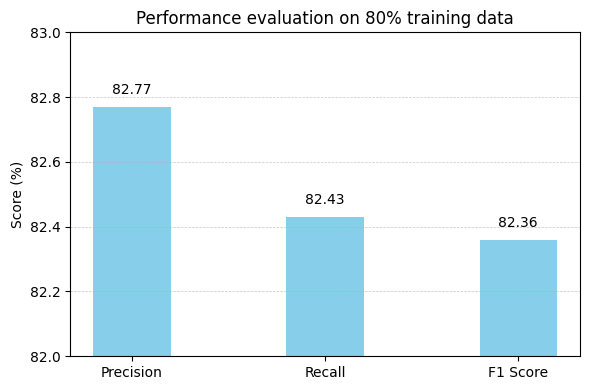

In [25]:
import matplotlib.pyplot as plt

# Scores (converted to %)
scores = [82.77, 82.43, 82.36]
labels = ['Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, scores, color='skyblue', width=0.4)

# Set Y-axis range similar to the figure
plt.ylim([82, 83])
plt.ylabel('Score (%)')
plt.title('Performance evaluation on 80% training data')
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Add value labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 0.03, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


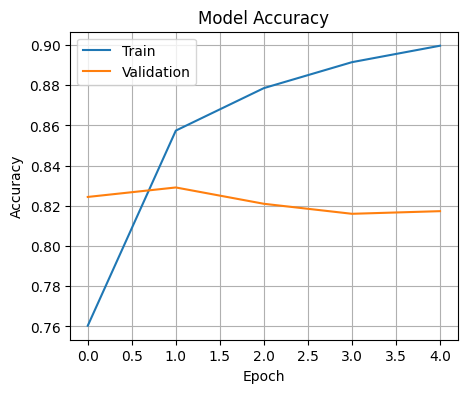

In [26]:
plt.figure(figsize=(5, 4))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

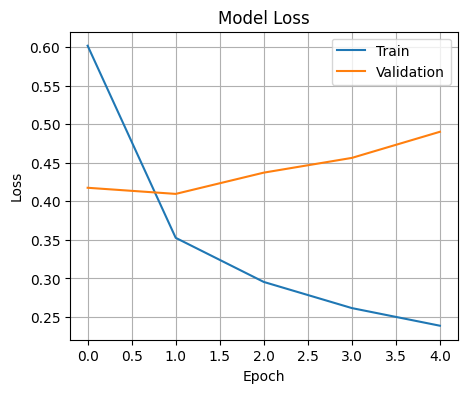

In [27]:
plt.figure(figsize=(5, 4))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

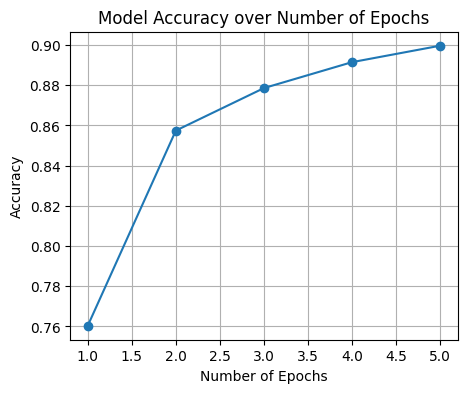

In [28]:
epochs = list(range(1, len(history.history['accuracy']) + 1))
accuracies = history.history['accuracy']
plt.figure(figsize=(5, 4))
plt.plot(epochs, accuracies, marker='o')
plt.title('Model Accuracy over Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()